   # 2D versus 3D LES simulations of ASTEX stratocumulus
   ### by Youtong Zheng, Univ. of Maryland, Aug 21, 2020

   This work attempts to examine to what degree the dimensions of LES simulations, i.e. 2D vs 3D, affect the simulated clouds. The motivation is that 3D LES simulation is often computationally expensive. If 2D simulations yeild not-so-different results, we may run 2D simulations to explore questions and use 3D simulations to confirm. This could save tons of computational resources. 

In [2]:
# setting up everything
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

from matplotlib import cm

%matplotlib inline

path="G:/My Drive/MyGit/Misc_LES/data"

file3D="ASTEX_cold2.6_120x120x512_35m_DRZ_RRTM_N100_3D.nc"
file2D="ASTEX_cold2.6_120x1x512_35m_DRZ_RRTM_N100_2D.nc"

f3D  = xr.open_dataset(path+"/"+file3D)
f2D  = xr.open_dataset(path+"/"+file2D)

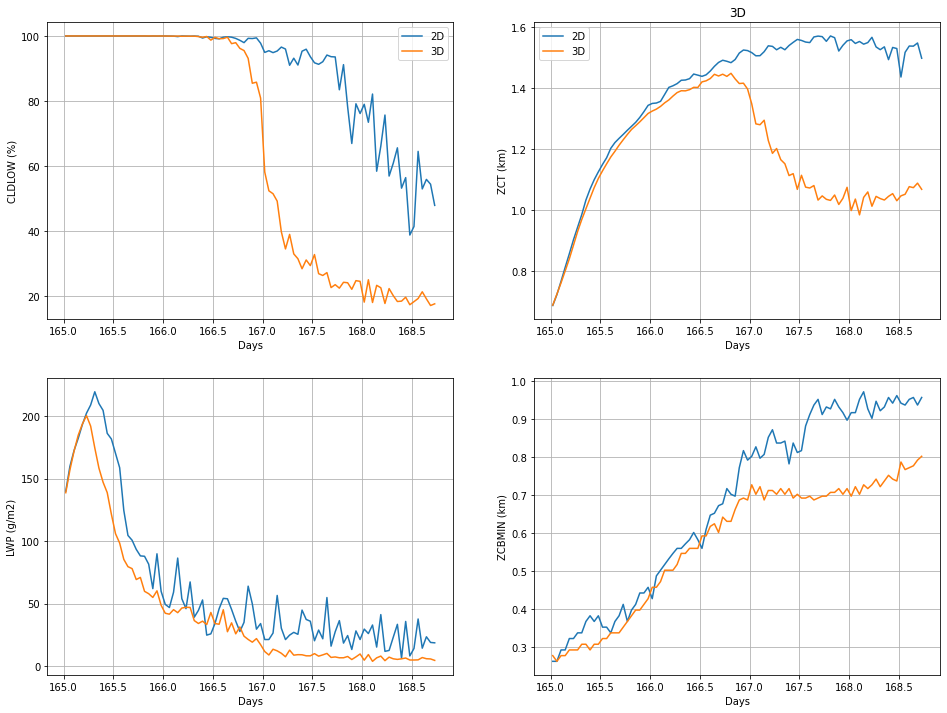

In [94]:
x = f2D['time']

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(16, 12))  # Create a figure and an axes.

#fig1
ax.plot(x, 100.*f2D['CLDLOW'], label='2D')  
ax.plot(x, 100.*f3D['CLDLOW'], label='3D') 

ax.set_xlabel('Days')  # Add an x-label to the axes.
ax.set_ylabel('CLDLOW (%)')  # Add a y-label to the axes.

ax.legend()
ax.grid(True)
ax.set_title('3D')

#fig2
ax2.plot(x, f2D['ZCT'], label='2D')  
ax2.plot(x, f3D['ZCT'], label='3D') 

ax2.set_xlabel('Days')  # Add an x-label to the axes.
ax2.set_ylabel('ZCT (km)')  # Add a y-label to the axes.

ax2.legend()
ax2.grid(True)
ax2.set_title('3D')

#fig3
ax3.plot(x, f2D['LWP'], label='2D')  
ax3.plot(x, f3D['LWP'], label='3D') 

ax3.set_xlabel('Days')  # Add an x-label to the axes.
ax3.set_ylabel('LWP (g/m2)')  # Add a y-label to the axes.

ax3.grid(True)

#fig4
ax4.plot(x, f2D['ZCBMIN'], label='2D')  
ax4.plot(x, f3D['ZCBMIN'], label='3D') 

ax4.set_xlabel('Days')  # Add an x-label to the axes.
ax4.set_ylabel('ZCBMIN (km)')  # Add a y-label to the axes.

ax4.grid(True)
plt.show()

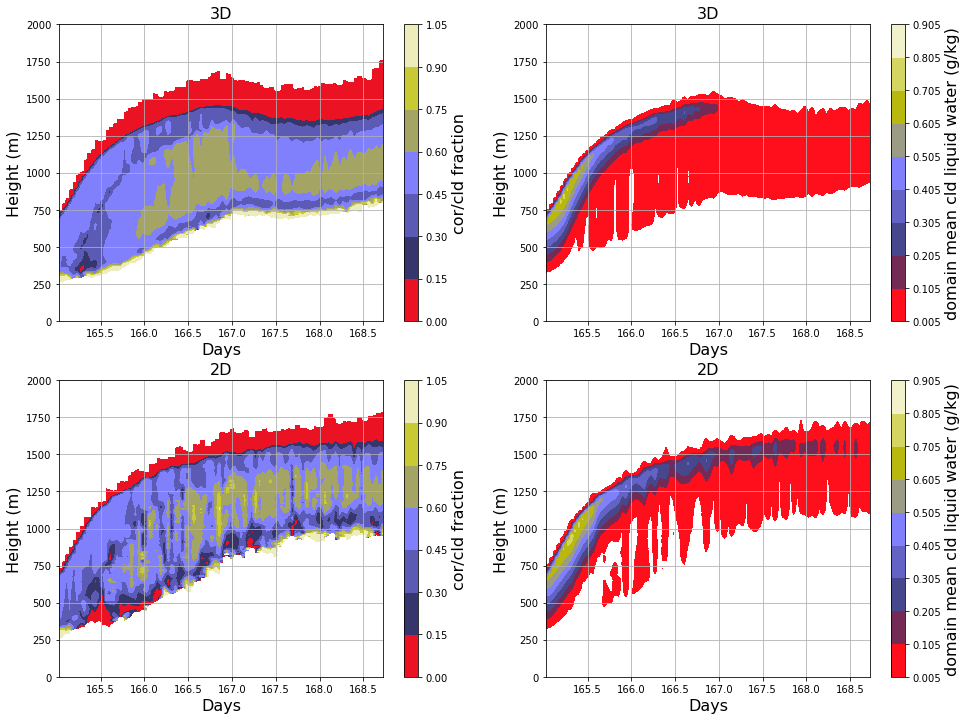

In [108]:
x = f2D['time']
y = f2D['z']
var2D = f2D['COR']/f2D['CLD']
var2D = var2D.T

var3D = f3D['COR']/f3D['CLD']
var3D = var3D.T

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(16, 12))  # Create a figure and an axes.
myfontsize = 16

#fig1
oax = ax.contourf(x,y,var3D, cmap = cm.gist_stern)

cbar = fig.colorbar(oax, ax = ax)
cbar.set_label('cor/cld fraction', fontsize=myfontsize)

ax.set_ylim([0., 2000])
ax.set_xlabel('Days', fontsize=myfontsize)  # Add an x-label to the axes.
ax.set_ylabel('Height (m)', fontsize=myfontsize)  # Add a y-label to the axes.
ax.grid(True)
ax.set_title('3D', fontsize=myfontsize)

#fig2
var2D = f2D['QC']
var2D = var2D.T

var3D = f3D['QC']
var3D = var3D.T

oax = ax2.contourf(x,y,var3D, cmap = cm.gist_stern, levels = np.arange(0.005,1.,0.1))

cbar = fig.colorbar(oax, ax = ax2)
cbar.set_label('domain mean cld liquid water (g/kg)', fontsize=myfontsize)

ax2.set_ylim([0., 2000])
ax2.set_xlabel('Days', fontsize=myfontsize)  # Add an x-label to the axes.
ax2.set_ylabel('Height (m)', fontsize=myfontsize)  # Add a y-label to the axes.
ax2.grid(True)
ax2.set_title('3D', fontsize=myfontsize)

#fig3
var2D = f2D['COR']/f2D['CLD']
var2D = var2D.T

oax = ax3.contourf(x,y,var2D, cmap = cm.gist_stern)

cbar = fig.colorbar(oax, ax = ax3)
cbar.set_label('cor/cld fraction', fontsize=myfontsize)

ax3.set_ylim([0., 2000])
ax3.set_xlabel('Days', fontsize=myfontsize)  # Add an x-label to the axes.
ax3.set_ylabel('Height (m)', fontsize=myfontsize)  # Add a y-label to the axes.
ax3.grid(True)
ax3.set_title('2D', fontsize=myfontsize)

#fig4
var2D = f2D['QC']
var2D = var2D.T

oax = ax4.contourf(x,y,var2D, cmap = cm.gist_stern, levels = np.arange(0.005,1.,0.1))

cbar = fig.colorbar(oax, ax = ax4)
cbar.set_label('domain mean cld liquid water (g/kg)', fontsize=myfontsize)

ax4.set_ylim([0., 2000])
ax4.set_xlabel('Days', fontsize=myfontsize)  # Add an x-label to the axes.
ax4.set_ylabel('Height (m)', fontsize=myfontsize)  # Add a y-label to the axes.
ax4.grid(True)
ax4.set_title('2D', fontsize=myfontsize)

plt.savefig("Fig2_cld_2dvs3d.png")

### Note

- 2D simulation shows a more persistent cloud.
- Cloud properties fluctuate more in 2D simulaitons whereas 3D clouds are more coherent. This makes sense.
- The mechanism of "deepening warming" (Brethereton and Wyant, 1997) holds very well, suggesting the capability of 2D LES in yeilding qualitatively resonable physics.  
